In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 1.

### Dataset “Babyboom” (переменные Time of birth recorded on the 24-hour clock, Sex of the child (1 = girl, 2 = boy), Birth weight in grams, Number of minutes after midnight of each birth):

##### 1.1)Проверьте вес младенцев на нормальность. Сначала используйте все данные, не разделяя детей по полу, затем для группы мальчиков и девочек по отдельности. При проверке гипотез используйте точечные оценки параметров. Постройте доверительные интервалы для параметров нормального распределения.

In [40]:
dt_babyboom = pd.read_csv(r'C:\Users\user\Downloads\deepseek_csv_20251029_429b07.txt')

In [41]:
dt_babyboom.head()

,Time of Birth,Sex,Birth Weight,minutes since midnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


Text(0.5, 1.0, 'Q-Q Plot')

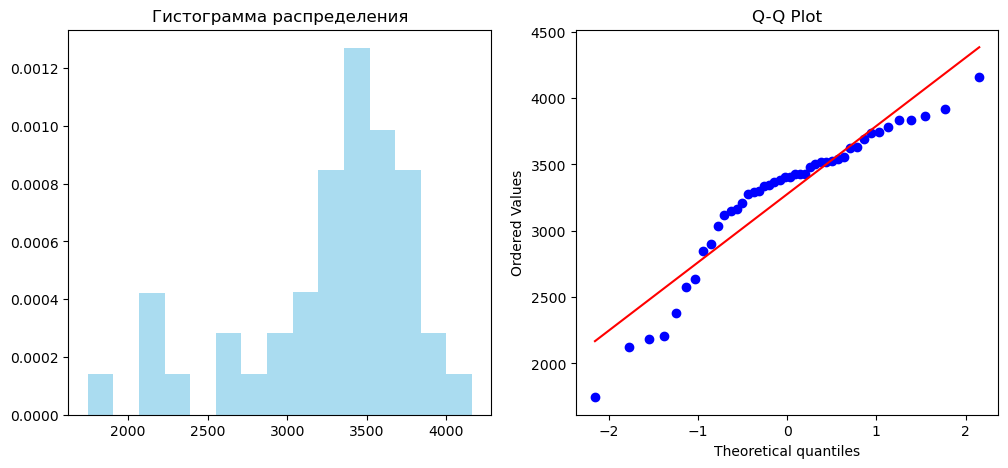

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.hist(dt_babyboom['Birth Weight'],bins=15, 
         density=True, 
         alpha=0.7,
         color='skyblue')
ax1.set_title('Гистограмма распределения')
stats.probplot(dt_babyboom['Birth Weight'],dist='norm',plot=ax2)
ax2.set_title('Q-Q Plot')

Критерий Колмогорова или Lilliefors test

Критерий Андресона-Дарлина или Anderson–Darling test

Критерий Крамера-фон-Мизеса или Cramer–von Mises test

Критерий Шапиро-Уилка или Shapiro–Wilk test

Критерий Харке-Бера (Jarque-Bera)

Критерий Пирсона

In [43]:
def normality_test(data, data_name="", alpha=0.05):
    """
    Проверка нормальности распределения с использованием точечных оценок параметров
    """
    # ТОЧЕЧНЫЕ ОЦЕНКИ ПАРАМЕТРОВ НОРМАЛЬНОГО РАСПРЕДЕЛЕНИЯ
    n = len(data)
    mu_hat = np.mean(data)      
    sigma_hat = np.std(data)   
    sigma_hat_ml = np.std(data,ddof=0)   
    results = []
    
    # 1. Шапиро-Уилк (Shapiro-Wilk) - не использует явно точечные оценки
    sw_stat, sw_p = stats.shapiro(data)
    results.append({
        'Test': 'Shapiro-Wilk',
        'Statistic': sw_stat,
        'P-value': sw_p,
        'Decision': 'Reject H₀' if sw_p < alpha else 'Fail to reject H₀',
        'Normality': 'Not Normal' if sw_p < alpha else 'Normal', 
        'Parameters_used': 'No (order statistics)'
        })
    
    # 2. Колмогоров-Смирнов (Kolmogorov-Smirnov) - использует точечные оценки
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(mu_hat, sigma_hat))
    results.append({
        'Test': 'Kolmogorov-Smirnov',
        'Statistic': ks_stat,
        'P-value': ks_p,
        'Decision': 'Reject H₀' if ks_p < alpha else 'Fail to reject H₀',
        'Normality': 'Not Normal' if ks_p < alpha else 'Normal',
        'Parameters_used': f'μ̂={mu_hat:.4f}, σ̂={sigma_hat:.4f}'
    })
    
    # 3. Андерсон-Дарлинг (Anderson-Darling) - использует точечные оценки
    ad_result = stats.anderson(data, 'norm')
    ad_stat = ad_result.statistic
    ad_critical_5 = ad_result.critical_values[2]  # 5% уровень
    ad_reject = ad_stat > ad_critical_5
    results.append({
        'Test': 'Anderson-Darling',
        'Statistic': ad_stat,
        'P-value': f'>{alpha}' if not ad_reject else f'<{alpha}',
        'Decision': 'Reject H₀' if ad_reject else 'Fail to reject H₀',
        'Normality': 'Not Normal' if ad_reject else 'Normal',
        'Parameters_used': f'μ̂={mu_hat:.4f}, σ̂={sigma_hat:.4f}'
    })
    
    # 4. Крамер-фон-Мизес (Cramer-von Mises) - использует точечные оценки
    cvm_result = stats.cramervonmises(data, 'norm', args=(mu_hat, sigma_hat))
    cvm_stat = cvm_result.statistic
    cvm_p = cvm_result.pvalue
    results.append({
        'Test': 'Cramer-von Mises',
        'Statistic': cvm_stat,
        'P-value': cvm_p,
        'Decision': 'Reject H₀' if cvm_p < alpha else 'Fail to reject H₀',
        'Normality': 'Not Normal' if cvm_p < alpha else 'Normal',
        'Parameters_used': f'μ̂={mu_hat:.4f}, σ̂={sigma_hat:.4f}'
    })
    
    # 5. Харке-Бера (Jarque-Bera) - использует точечные оценки моментов
    skew_val = stats.skew(data)           # Точечная оценка асимметрии
    kurt_val = stats.kurtosis(data)       # Точечная оценка эксцесса
    jb_stat = (n/6) * (skew_val**2 + (kurt_val**2)/4)
    jb_p = 1 - stats.chi2.cdf(jb_stat, 2)
    results.append({
        'Test': 'Jarque-Bera',
        'Statistic': jb_stat,
        'P-value': jb_p,
        'Decision': 'Reject H₀' if jb_p < alpha else 'Fail to reject H₀',
        'Normality': 'Not Normal' if jb_p < alpha else 'Normal',
        'Parameters_used': f'Skew={skew_val:.4f}, Kurtosis={kurt_val:.4f}'
    })
    
    # 6. Критерий Пирсона (Chi-square) - использует точечные оценки
    
    chi2_stat, p_value = stats.normaltest(data)
    
    results.append({
        'Test': 'Pearson Chi-square',
        'Statistic': chi2_stat,
        'P-value': p_value,
        'Decision': 'Reject H₀' if p_value < alpha else 'Fail to reject H₀',
        'Normality': 'Not Normal' if p_value < alpha else 'Normal',
        'Parameters_used': f'μ̂={mu_hat:.4f}, σ̂_МП={sigma_hat_ml:.4f}'
    })
    
    # Создаем DataFrame
    df_results = pd.DataFrame(results)
    
    valid_tests = [r for r in results if r['Normality'] in ['Normal', 'Not Normal']]
    normal_count = len([r for r in valid_tests if r['Normality'] == 'Normal'])
    total_valid_tests = len(valid_tests)
    
    print(f"\n{normal_count}/{total_valid_tests} тестов поддерживают нормальность")
    return df_results

normality_test(dt_babyboom['Birth Weight'],'Birth Weight')


2/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.898723,0.000994,Reject H₀,Not Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.183381,0.091011,Fail to reject H₀,Normal,"μ̂=3275.9545, σ̂=521.9976"
2,Anderson-Darling,1.716846,<0.05,Reject H₀,Not Normal,"μ̂=3275.9545, σ̂=521.9976"
3,Cramer-von Mises,0.309612,0.126834,Fail to reject H₀,Normal,"μ̂=3275.9545, σ̂=521.9976"
4,Jarque-Bera,10.351561,0.005652,Reject H₀,Not Normal,"Skew=-1.1165, Kurtosis=0.8125"
5,Pearson Chi-square,10.774205,0.004575,Reject H₀,Not Normal,"μ̂=3275.9545, σ̂_МП=521.9976"


In [51]:
def ci_normal(data, confidence=0.95):
    """ДИ для нормального распределения"""
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    
    t_val = stats.t.ppf((1 + confidence) / 2, n-1)
    ci_mean = (mean - t_val * std/np.sqrt(n), 
               mean + t_val * std/np.sqrt(n))
    
    chi2_low = stats.chi2.ppf((1 - confidence) / 2, n-1)
    chi2_up = stats.chi2.ppf((1 + confidence) / 2, n-1)
    ci_var = ((n-1) * std**2 / chi2_up, 
              (n-1) * std**2 / chi2_low)
    
    
    return pd.DataFrame({
        'mean_ci': ci_mean,
        'var_ci': ci_var
    })

ci_normal(dt_babyboom['Birth Weight'])

,mean_ci,var_ci
0,3115.418005,190333.675814
1,3436.491086,447601.957508


In [52]:
girl_dt = dt_babyboom['Birth Weight'][dt_babyboom['Sex'] == 1]
boy_dt = dt_babyboom['Birth Weight'][dt_babyboom['Sex'] == 2]

Text(0.5, 1.0, 'Q-Q Plot')

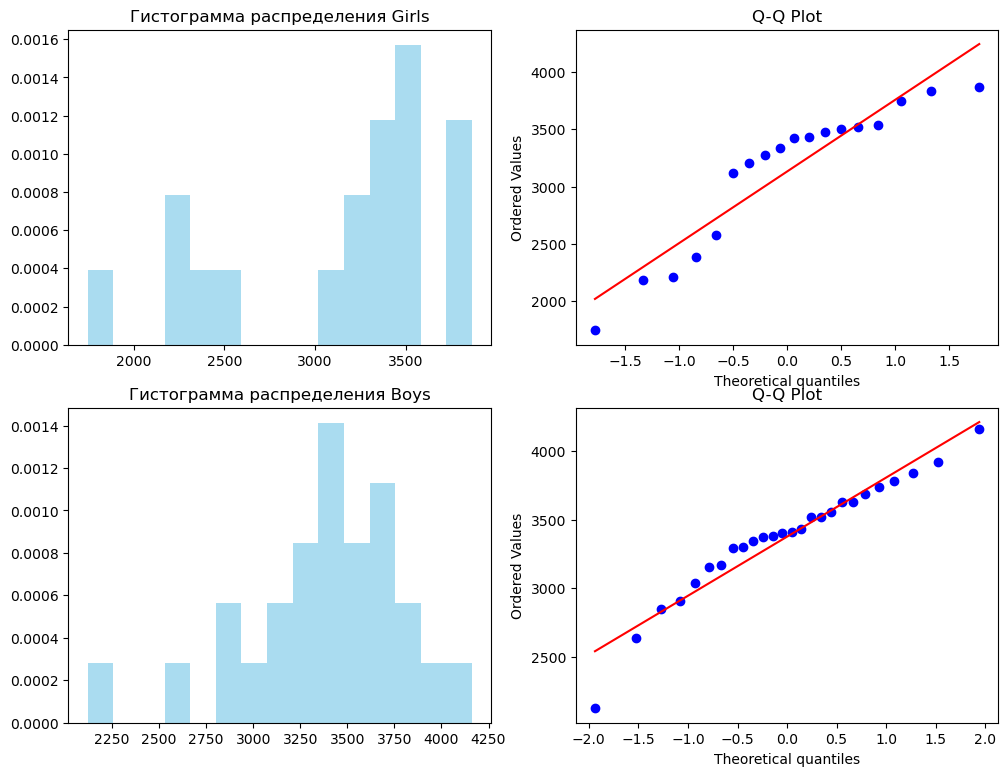

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,9))
axes[0,0].hist(girl_dt,bins=15, 
         density=True, 
         alpha=0.7,
         color='skyblue')
axes[0,0].set_title('Гистограмма распределения Girls')
stats.probplot(girl_dt,dist='norm',plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot')
axes[1,0].hist(boy_dt,bins=15, 
         density=True, 
         alpha=0.7,
         color='skyblue')
axes[1,0].set_title('Гистограмма распределения Boys')
stats.probplot(boy_dt,dist='norm',plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot')

In [ ]:
normality_test(girl_dt,'Girl_Weight')


4/6 тестов поддерживают нормальность


c:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.870283,0.017985,Reject H₀,Not Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.215652,0.324333,Fail to reject H₀,Normal,"μ̂=3132.4444, σ̂=613.7879"
2,Anderson-Darling,1.026561,<0.05,Reject H₀,Not Normal,"μ̂=3132.4444, σ̂=613.7879"
3,Cramer-von Mises,0.202485,0.263908,Fail to reject H₀,Normal,"μ̂=3132.4444, σ̂=613.7879"
4,Jarque-Bera,2.477896,0.289689,Fail to reject H₀,Normal,"Skew=-0.8765, Kurtosis=-0.4807"
5,Pearson Chi-square,3.182401,0.203681,Fail to reject H₀,Normal,"μ̂=3132.4444, σ̂_МП=613.7879"


In [ ]:
normality_test(boy_dt,'Boy_Weight')


5/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.947474,0.202248,Fail to reject H₀,Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.153970,0.519117,Fail to reject H₀,Normal,"μ̂=3375.3077, σ̂=419.7337"
2,Anderson-Darling,0.472466,>0.05,Fail to reject H₀,Normal,"μ̂=3375.3077, σ̂=419.7337"
3,Cramer-von Mises,0.076886,0.714256,Fail to reject H₀,Normal,"μ̂=3375.3077, σ̂=419.7337"
4,Jarque-Bera,5.570161,0.061724,Fail to reject H₀,Normal,"Skew=-0.9140, Kurtosis=1.3416"
5,Pearson Chi-square,7.555056,0.022879,Reject H₀,Not Normal,"μ̂=3375.3077, σ̂_МП=419.7337"


In [54]:
ci_normal(girl_dt)

,mean_ci,var_ci
0,2818.365840,224611.254865
1,3446.523049,896493.031954


In [55]:
ci_normal(boy_dt)

,mean_ci,var_ci
0,3202.416151,112693.319681
1,3548.199234,349137.445750


Наложение ДИ среднего друг на друга. Группы имеют схожее среднее значение и разную дисперсию

##### 1.2) Проверьте гипотезу о том, что время между рождением детей подчиняется экспоненциальному распределению. При проверке гипотезы используйте точечные оценки параметров.

In [ ]:
def exponential_fit(data, alpha=0.05):
    n = len(data)
    
    # Для Exp(λ): E[X] = 1/λ, поэтому λ̂ = 1/mean(data)
    lambda_hat = 1 / np.mean(data)
    
    print(f"Объем выборки: n = {n}")
    print(f"Точечная оценка параметра: λ̂ = 1 / {np.mean(data):.4f} = {lambda_hat:.6f}")
    print(f"Уровень значимости: α = {alpha}")
    print()
    
    results = []
    
    # 1. Критерий Колмогорова-Смирнова
    ks_stat, ks_p = stats.kstest(data, 'expon', args=(0, 1/lambda_hat))
    results.append({
        'Test': 'Kolmogorov-Smirnov',
        'Statistic': ks_stat,
        'P-value': ks_p,
        'Decision': 'Reject H₀' if ks_p < alpha else 'Fail to reject H₀'
    })
    
    # 2. Критерий Крамера-фон-Мизеса
    cvm_result = stats.cramervonmises(data, 'expon', args=(0, 1/lambda_hat))
    results.append({
        'Test': 'Cramer-von Mises', 
        'Statistic': cvm_result.statistic,
        'P-value': cvm_result.pvalue,
        'Decision': 'Reject H₀' if cvm_result.pvalue < alpha else 'Fail to reject H₀'
    })
    
    # 3. Критерий Андерсона-Дарлинга
    ad_result = stats.anderson(data, 'expon')
    ad_stat = ad_result.statistic
    ad_critical = ad_result.critical_values[2]  
    ad_reject = ad_stat > ad_critical
    results.append({
        'Test': 'Anderson-Darling',
        'Statistic': ad_stat,
        'P-value': f'>{alpha}' if not ad_reject else f'<{alpha}',
        'Decision': 'Reject H₀' if ad_reject else 'Fail to reject H₀'
    })
    
    
    df_results = pd.DataFrame(results)
    
    valid_tests = [r for r in results if 'Error' not in str(r.get('P-value', '')) and '>' not in str(r.get('P-value', ''))]
    reject_count = sum(1 for r in valid_tests if 'Reject' in r['Decision'])
    total_tests = len(valid_tests)
    
    print(f"\n{reject_count}/{total_tests} тестов отвергают H₀")
    
    return df_results
time_dt = np.sort(dt_babyboom['Time of Birth'])
time_dt = np.diff(time_dt)
exponential_fit(time_dt,0.05)

Объем выборки: n = 43
Точечная оценка параметра: λ̂ = 1 / 54.6512 = 0.018298
Среднее время между рождениями: 54.6512 минут
Уровень значимости: α = 0.05


0/2 тестов отвергают H₀


,Test,Statistic,P-value,Decision
0,Kolmogorov-Smirnov,0.080345,0.9232,Fail to reject H₀
1,Cramer-von Mises,0.055107,0.847325,Fail to reject H₀
2,Anderson-Darling,0.465843,>0.05,Fail to reject H₀


Показывают на экспоненциальное распределение

Text(0.5, 1.0, 'Q-Q Plot')

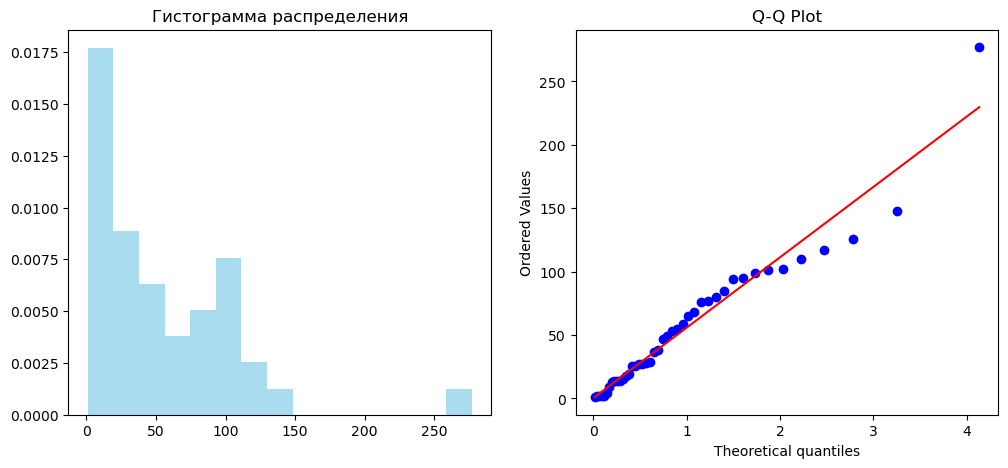

In [57]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.hist(time_dt,bins=15, 
         density=True, 
         alpha=0.7,
         color='skyblue')
ax1.set_title('Гистограмма распределения')
stats.probplot(time_dt,dist='expon',plot=ax2)
ax2.set_title('Q-Q Plot')

##### 1.3) Проверьте гипотезу, подчиняется ли количество рождений в час для каждого часа распределению Пуассона. При проверке гипотезы используйте точечные оценки параметров.

In [ ]:
dt_babyboom['hour'] = np.ceil(dt_babyboom['minutes since midnight'] / 60)
dt_hour = dt_babyboom['hour'].value_counts().sort_index()

In [ ]:
def poisson_test(data, data_name="", alpha=0.05):
    lambda_hat = np.mean(data)
    n = len(data)
    
    print(f"Объем выборки: n = {n}")
    print(f"Точечная оценка параметра: λ̂ = {lambda_hat:.4f}")
    print(f"Дисперсия: {np.var(data, ddof=1):.4f}")
    print(f"Отношение дисперсии к среднему: {np.var(data, ddof=1)/lambda_hat:.4f}")
    print(f"Уровень значимости: α = {alpha}")
    print()
    
    results = []
    
    # 1. Критерий Колмогорова-Смирнова
    ks_stat, ks_p = stats.kstest(data, 'poisson', args=(lambda_hat,))
    results.append({
        'Test': 'Kolmogorov-Smirnov',
        'Statistic': ks_stat,
        'P-value': ks_p,
        'Decision': 'Reject H₀' if ks_p < alpha else 'Fail to reject H₀'
    })
    
    # 2. Критерий Крамера-фон-Мизеса
    try:
        # Вычисляем вручную, так как scipy не поддерживает Пуассон напрямую
        sorted_data = np.sort(data)
        n = len(sorted_data)
        ecdf = np.arange(1, n + 1) / n
        theoretical_cdf = stats.poisson.cdf(sorted_data, lambda_hat)
        
        # Статистика Крамера-фон-Мизеса
        cvm_stat = np.sum((ecdf - theoretical_cdf)**2) + 1/(12*n)
        # Приблизительный p-value (используем аппроксимацию)
        cvm_p = 1 - stats.chi2.cdf(cvm_stat * 12 * n, 1)
        
        results.append({
            'Test': 'Cramer-von Mises',
            'Statistic': cvm_stat,
            'P-value': cvm_p,
            'Decision': 'Reject H₀' if cvm_p < alpha else 'Fail to reject H₀'
        })
    except Exception as e:
        results.append({
            'Test': 'Cramer-von Mises',
            'Statistic': f'Error: {e}',
            'P-value': 'Error',
            'Decision': 'Error'
        })
    
    # 3. Критерий Андерсона-Дарлинга
    sorted_data = np.sort(data)
    n = len(sorted_data)
    ecdf = np.arange(1, n + 1) / n
    theoretical_cdf = stats.poisson.cdf(sorted_data, lambda_hat)
        
    ad_stat = -n - np.sum((2*np.arange(1, n+1) - 1) * 
                             (np.log(theoretical_cdf) + np.log(1 - theoretical_cdf + 1e-10)) / n)
        
    ad_critical = 2.492 
    ad_reject = ad_stat > ad_critical
        
    results.append({
            'Test': 'Anderson-Darling',
            'Statistic': ad_stat,
            'P-value': f'>{alpha}' if not ad_reject else f'<{alpha}',
            'Decision': 'Reject H₀' if ad_reject else 'Fail to reject H₀'
    })
    df_results = pd.DataFrame(results)
    valid_tests = [r for r in results if 'Error' not in str(r.get('P-value', '')) and '>' not in str(r.get('P-value', ''))]
    reject_count = sum(1 for r in valid_tests if 'Reject' in r['Decision'])
    total_tests = len(valid_tests)
    
    print(f"\n {reject_count}/{total_tests} тестов отвергают H₀")
    return df_results

poisson_test(dt_hour, 'Baby for Hour')

Объем выборки: n = 21
Точечная оценка параметра: λ̂ = 2.0952
Дисперсия: 1.1905
Отношение дисперсии к среднему: 0.5682
Уровень значимости: α = 0.05


 3/3 тестов отвергают H₀


,Test,Statistic,P-value,Decision
0,Kolmogorov-Smirnov,0.380841,0.00301,Reject H₀
1,Cramer-von Mises,0.452891,0.0,Reject H₀
2,Anderson-Darling,20.813741,<0.05,Reject H₀


Указывают на то что распределение не Пуассона

# 2. 

### Dataset “Euroweight” (переменные weight, batch):

##### 2.1) Проверить гипотезу о нормальном распределении веса монет (сначала объединить все монеты в одну выборку, потом по каждому пакету в отдельности). При проверке гипотез используйте точечные оценки параметров. 

In [ ]:
dt_euro = pd.read_csv(r'c:\Users\user\Downloads\deepseek_csv_20251126_3a6347 (1).txt',names=['id', 'weight', 'batch'], header=0, index_col=0)

In [ ]:
dt_euro.head()

,weight,batch
id,,
1,7.512,1
2,7.502,1
3,7.461,1
4,7.562,1
5,7.528,1


In [ ]:
normality_test(dt_euro['weight'],'Money Weight')


2/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.975473,0.0,Reject H₀,Not Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.023340,0.222494,Fail to reject H₀,Normal,"μ̂=7.5212, σ̂=0.0344"
2,Anderson-Darling,1.621291,<0.05,Reject H₀,Not Normal,"μ̂=7.5212, σ̂=0.0344"
3,Cramer-von Mises,0.181918,0.305435,Fail to reject H₀,Normal,"μ̂=7.5212, σ̂=0.0344"
4,Jarque-Bera,1645.246020,0.0,Reject H₀,Not Normal,"Skew=-0.1884, Kurtosis=4.4273"
5,Pearson Chi-square,9.809040,0.007413,Reject H₀,Not Normal,"μ̂=7.5212, σ̂_МП=0.0344, bins=11"


Text(0.5, 1.0, 'Q-Q Plot')

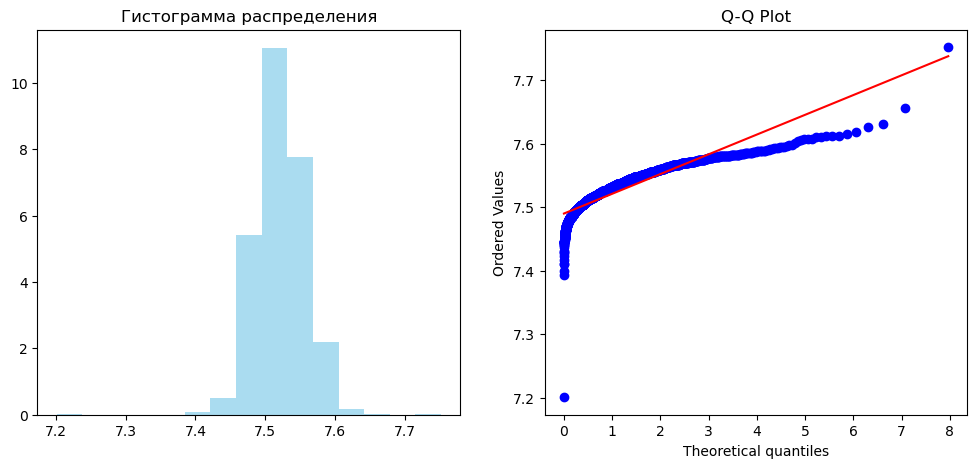

In [62]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.hist(dt_euro['weight'],bins=15, 
         density=True, 
         alpha=0.7,
         color='skyblue')
ax1.set_title('Гистограмма распределения')
stats.probplot(dt_euro['weight'],dist='expon',plot=ax2)
ax2.set_title('Q-Q Plot')

Скорее указывают на ненормальное распределение чем на нормальное

In [ ]:
dt1_bt = dt_euro['weight'][dt_euro['batch'] == 1]
dt2_bt = dt_euro['weight'][dt_euro['batch'] == 2]
dt3_bt = dt_euro['weight'][dt_euro['batch'] == 3]
dt4_bt = dt_euro['weight'][dt_euro['batch'] == 4]
dt5_bt = dt_euro['weight'][dt_euro['batch'] == 5]
dt6_bt = dt_euro['weight'][dt_euro['batch'] == 6]
dt7_bt = dt_euro['weight'][dt_euro['batch'] == 7]
dt8_bt = dt_euro['weight'][dt_euro['batch'] == 8]

In [ ]:
normality_test(dt1_bt)


6/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.995507,0.683002,Fail to reject H₀,Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.038766,0.83231,Fail to reject H₀,Normal,"μ̂=7.5197, σ̂=0.0343"
2,Anderson-Darling,0.358994,>0.05,Fail to reject H₀,Normal,"μ̂=7.5197, σ̂=0.0343"
3,Cramer-von Mises,0.063642,0.791521,Fail to reject H₀,Normal,"μ̂=7.5197, σ̂=0.0343"
4,Jarque-Bera,1.295175,0.523307,Fail to reject H₀,Normal,"Skew=0.1589, Kurtosis=-0.1528"
5,Pearson Chi-square,3.118569,0.538183,Fail to reject H₀,Normal,"μ̂=7.5197, σ̂_МП=0.0343, bins=8"


In [ ]:
normality_test(dt2_bt)


6/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.990900,0.121877,Fail to reject H₀,Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.032487,0.946727,Fail to reject H₀,Normal,"μ̂=7.5232, σ̂=0.0354"
2,Anderson-Darling,0.319866,>0.05,Fail to reject H₀,Normal,"μ̂=7.5232, σ̂=0.0354"
3,Cramer-von Mises,0.044312,0.910156,Fail to reject H₀,Normal,"μ̂=7.5232, σ̂=0.0354"
4,Jarque-Bera,3.687846,0.158196,Fail to reject H₀,Normal,"Skew=-0.2001, Kurtosis=0.4403"
5,Pearson Chi-square,3.093131,0.377488,Fail to reject H₀,Normal,"μ̂=7.5232, σ̂_МП=0.0354, bins=8"


In [ ]:
normality_test(dt3_bt)


2/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.863432,0.0,Reject H₀,Not Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.077438,0.094581,Fail to reject H₀,Normal,"μ̂=7.5095, σ̂=0.0370"
2,Anderson-Darling,2.563141,<0.05,Reject H₀,Not Normal,"μ̂=7.5095, σ̂=0.0370"
3,Cramer-von Mises,0.323922,0.115869,Fail to reject H₀,Normal,"μ̂=7.5095, σ̂=0.0370"
4,Jarque-Bera,3676.215889,0.0,Reject H₀,Not Normal,"Skew=-2.1187, Kurtosis=18.3020"
5,Pearson Chi-square,15.767990,0.000072,Reject H₀,Not Normal,"μ̂=7.5095, σ̂_МП=0.0370, bins=8"


In [ ]:
normality_test(dt4_bt)


6/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.995505,0.682659,Fail to reject H₀,Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.045768,0.654318,Fail to reject H₀,Normal,"μ̂=7.5311, σ̂=0.0294"
2,Anderson-Darling,0.393595,>0.05,Fail to reject H₀,Normal,"μ̂=7.5311, σ̂=0.0294"
3,Cramer-von Mises,0.067563,0.767051,Fail to reject H₀,Normal,"μ̂=7.5311, σ̂=0.0294"
4,Jarque-Bera,1.337812,0.512269,Fail to reject H₀,Normal,"Skew=-0.0031, Kurtosis=-0.3583"
5,Pearson Chi-square,2.006328,0.571094,Fail to reject H₀,Normal,"μ̂=7.5311, σ̂_МП=0.0294, bins=8"


In [ ]:
normality_test(dt5_bt)


6/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.991034,0.128993,Fail to reject H₀,Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.035403,0.90149,Fail to reject H₀,Normal,"μ̂=7.5314, σ̂=0.0296"
2,Anderson-Darling,0.254501,>0.05,Fail to reject H₀,Normal,"μ̂=7.5314, σ̂=0.0296"
3,Cramer-von Mises,0.040035,0.93332,Fail to reject H₀,Normal,"μ̂=7.5314, σ̂=0.0296"
4,Jarque-Bera,4.087935,0.129514,Fail to reject H₀,Normal,"Skew=0.1731, Kurtosis=0.5221"
5,Pearson Chi-square,0.802330,0.84891,Fail to reject H₀,Normal,"μ̂=7.5314, σ̂_МП=0.0296, bins=8"


In [ ]:
normality_test(dt6_bt)


2/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.984059,0.006756,Reject H₀,Not Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.055526,0.409069,Fail to reject H₀,Normal,"μ̂=7.5152, σ̂=0.0334"
2,Anderson-Darling,1.199630,<0.05,Reject H₀,Not Normal,"μ̂=7.5152, σ̂=0.0334"
3,Cramer-von Mises,0.169710,0.334883,Fail to reject H₀,Normal,"μ̂=7.5152, σ̂=0.0334"
4,Jarque-Bera,7.041523,0.029577,Reject H₀,Not Normal,"Skew=0.4110, Kurtosis=-0.0183"
5,Pearson Chi-square,10.382483,0.01558,Reject H₀,Not Normal,"μ̂=7.5152, σ̂_МП=0.0334, bins=8"


In [ ]:
normality_test(dt7_bt)


6/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.990701,0.111983,Fail to reject H₀,Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.042779,0.733428,Fail to reject H₀,Normal,"μ̂=7.5230, σ̂=0.0329"
2,Anderson-Darling,0.442076,>0.05,Fail to reject H₀,Normal,"μ̂=7.5230, σ̂=0.0329"
3,Cramer-von Mises,0.055091,0.845284,Fail to reject H₀,Normal,"μ̂=7.5230, σ̂=0.0329"
4,Jarque-Bera,1.987806,0.370129,Fail to reject H₀,Normal,"Skew=-0.2073, Kurtosis=-0.1378"
5,Pearson Chi-square,3.265333,0.514444,Fail to reject H₀,Normal,"μ̂=7.5230, σ̂_МП=0.0329, bins=8"


In [ ]:
normality_test(dt8_bt)


2/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.936720,0.0,Reject H₀,Not Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.069960,0.165003,Fail to reject H₀,Normal,"μ̂=7.5167, σ̂=0.0363"
2,Anderson-Darling,1.404351,<0.05,Reject H₀,Not Normal,"μ̂=7.5167, σ̂=0.0363"
3,Cramer-von Mises,0.223537,0.226211,Fail to reject H₀,Normal,"μ̂=7.5167, σ̂=0.0363"
4,Jarque-Bera,462.207058,0.0,Reject H₀,Not Normal,"Skew=1.2951, Kurtosis=6.1370"
5,Pearson Chi-square,4.755643,0.029202,Reject H₀,Not Normal,"μ̂=7.5167, σ̂_МП=0.0363, bins=8"


1,2,4,5,7 показывают нормальность

##### 2.2) Постройте доверительные интервалы для параметров нормального распределения.

Для полного признака

In [63]:
ci_normal(dt_euro['weight'])

,mean_ci,var_ci
0,7.519725,0.001112
1,7.522740,0.001259


Для отдельных

In [72]:
ci_normal(dt1_bt), ci_normal(dt2_bt),ci_normal(dt3_bt), ci_normal(dt4_bt),ci_normal(dt5_bt),ci_normal(dt6_bt),ci_normal(dt7_bt), ci_normal(dt8_bt)

(    mean_ci    var_ci
 0  7.515376  0.000998
 1  7.523936  0.001419,
     mean_ci    var_ci
 0  7.518748  0.001064
 1  7.527588  0.001513,
     mean_ci    var_ci
 0  7.504930  0.001160
 1  7.514158  0.001649,
     mean_ci    var_ci
 0  7.527440  0.000731
 1  7.534768  0.001040,
     mean_ci    var_ci
 0  7.527706  0.000742
 1  7.535086  0.001055,
     mean_ci    var_ci
 0  7.511077  0.000944
 1  7.519403  0.001343,
     mean_ci    var_ci
 0  7.518906  0.000920
 1  7.527126  0.001309,
     mean_ci    var_ci
 0  7.512205  0.001118
 1  7.521267  0.001590)

У многих пересекаются ДИ - похожие данные, узкие ДИ - доверительные данные

# 3.

### Dataset “iris.txt” (прочитайте описание данных в файле «iris_description.txt», переменные sepal length, sepal width, petal length, petal width, class):

In [ ]:
dt_iris = pd.read_csv(r'c:\Users\user\Downloads\deepseek_csv_20251126_eff4ae.txt')

In [ ]:
dt_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### 3.1) Проверить гипотезу о нормальном распределении длины цветков, сгруппировав их по типу ириса. При проверке гипотез используйте точечные оценки параметров. 

In [ ]:

iris_types = dt_iris['class'].unique()
results = []

print(iris_types[0])
petal_length_data = dt_iris[dt_iris['class'] == iris_types[0]]['petal_length']
normality_test(petal_length_data)

Iris-setosa

4/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.954946,0.05465,Fail to reject H₀,Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.156995,0.152621,Fail to reject H₀,Normal,"μ̂=1.4640, σ̂=0.1718"
2,Anderson-Darling,1.011127,<0.05,Reject H₀,Not Normal,"μ̂=1.4640, σ̂=0.1718"
3,Cramer-von Mises,0.188910,0.290584,Fail to reject H₀,Normal,"μ̂=1.4640, σ̂=0.1718"
4,Jarque-Bera,1.419724,0.491712,Fail to reject H₀,Normal,"Skew=0.0697, Kurtosis=0.8137"
5,Pearson Chi-square,5.616120,0.017796,Reject H₀,Not Normal,"μ̂=1.4640, σ̂_МП=0.1718, bins=6"


In [ ]:
print(iris_types[1])
petal_length_data = dt_iris[dt_iris['class'] == iris_types[1]]['petal_length']
normality_test(petal_length_data)

Iris-versicolor

5/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.966004,0.158478,Fail to reject H₀,Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.118275,0.451896,Fail to reject H₀,Normal,"μ̂=4.2600, σ̂=0.4652"
2,Anderson-Darling,0.555056,>0.05,Fail to reject H₀,Normal,"μ̂=4.2600, σ̂=0.4652"
3,Cramer-von Mises,0.090866,0.633507,Fail to reject H₀,Normal,"μ̂=4.2600, σ̂=0.4652"
4,Jarque-Bera,2.894288,0.235241,Fail to reject H₀,Normal,"Skew=-0.5882, Kurtosis=-0.0744"
5,Pearson Chi-square,6.379266,0.011546,Reject H₀,Not Normal,"μ̂=4.2600, σ̂_МП=0.4652, bins=6"


In [ ]:
print(iris_types[2])
petal_length_data = dt_iris[dt_iris['class'] == iris_types[2]]['petal_length']
normality_test(petal_length_data)

Iris-virginica

5/6 тестов поддерживают нормальность


,Test,Statistic,P-value,Decision,Normality,Parameters_used
0,Shapiro-Wilk,0.962186,0.109775,Fail to reject H₀,Normal,No (order statistics)
1,Kolmogorov-Smirnov,0.115970,0.476731,Fail to reject H₀,Normal,"μ̂=5.5520, σ̂=0.5463"
2,Anderson-Darling,0.608956,>0.05,Fail to reject H₀,Normal,"μ̂=5.5520, σ̂=0.5463"
3,Cramer-von Mises,0.087311,0.652735,Fail to reject H₀,Normal,"μ̂=5.5520, σ̂=0.5463"
4,Jarque-Bera,2.502864,0.286095,Fail to reject H₀,Normal,"Skew=0.5328, Kurtosis=-0.2565"
5,Pearson Chi-square,4.777563,0.028833,Reject H₀,Not Normal,"μ̂=5.5520, σ̂_МП=0.5463, bins=6"


Данные по большей части похожи на нормальные

##### 3.2) Постройте доверительные интервалы для параметров нормального распределения.

In [75]:
print(iris_types[0])
petal_length_data = dt_iris[dt_iris['class'] == iris_types[0]]['petal_length']
ci_normal(petal_length_data)

Iris-setosa


,mean_ci,var_ci
0,1.414689,0.021008
1,1.513311,0.046750


In [76]:
print(iris_types[1])
petal_length_data = dt_iris[dt_iris['class'] == iris_types[1]]['petal_length']
ci_normal(petal_length_data)

Iris-versicolor


,mean_ci,var_ci
0,4.126453,0.154082
1,4.393547,0.342894


In [77]:
print(iris_types[2])
petal_length_data = dt_iris[dt_iris['class'] == iris_types[2]]['petal_length']
ci_normal(petal_length_data)

Iris-virginica


,mean_ci,var_ci
0,5.395153,0.212536
1,5.708847,0.472979


Есть наложения в дисперсии, но в целом у нас неплохие различия в группах и маленькая неопределенность